In [1]:
import pandas as pd

%matplotlib inline

# Preliminaries

## Questions 1

### Solution I

In [2]:
crimes = pd.read_csv('crimes.csv', parse_dates=['Dates'], index_col='Dates')
# crimes.head()

### Solution II

In [3]:
crimes = pd.read_csv('crimes.csv')
crimes['Dates'] = pd.to_datetime(crimes.Dates)
crimes.set_index('Dates', inplace=True)
# crimes.head()

## Question 2

Remove records of the categories 'OTHER OFFENSES' and 'NON-CRIMINAL', and also categories with less than 100 records.

In [4]:
len(crimes)

878049

In [5]:
crimes = crimes[~crimes.Category.isin(['OTHER OFFENSES', 'NON-CRIMINAL'])]

In [6]:
len(crimes)

659563

In [8]:
crimes.groupby('Category').filter(lambda grp: len(grp) > 100)

In [9]:
len(crimes)

659535

## Question 3

Draw a scatter plot of X and Y, and remove the outliers based on the graph.

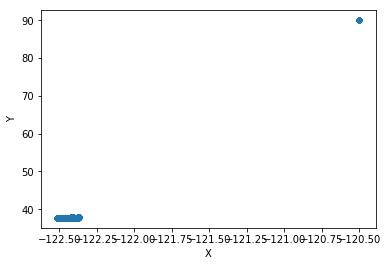

In [10]:
crimes.plot.scatter(x='X', y='Y')

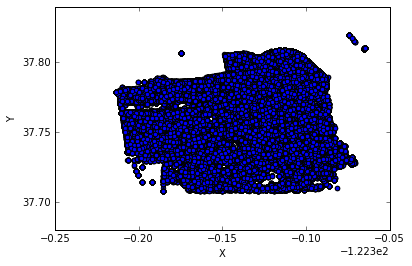

In [7]:
crimes = crimes[crimes.X.between(-123, -122) & crimes.Y.between(30, 40)]
crimes.plot.scatter(x='X', y='Y')

### Challenge

Color the markers based on their coresponding _PdDistrict_.

In [11]:
district_colors = {'NORTHERN': 'red', 'PARK': 'green', 
                   'INGLESIDE': 'blue', 'BAYVIEW': 'orange', 
                   'RICHMOND': 'purple', 'CENTRAL': 'yellow',
                   'TENDERLOIN': 'brown', 'TARAVAL': 'black', 
                   'SOUTHERN': 'white', 'MISSION': 'grey'}

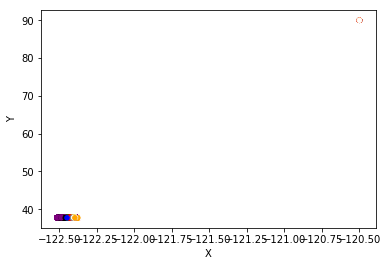

In [12]:
crimes.plot.scatter(x='X', y='Y', 
                    c=crimes.PdDistrict.apply(lambda x: district_colors[x]))

# Simple questions

## Question 1

In [17]:
%%timeit
for col in crimes.columns:
    col, crimes[col].nunique()

1 loop, best of 3: 216 ms per loop


In [18]:
%%timeit
crimes.apply(pd.Series.nunique)

1 loop, best of 3: 503 ms per loop


In [19]:
%%timeit
crimes.apply(lambda s: s.nunique())

1 loop, best of 3: 486 ms per loop


In [10]:
crimes.apply(pd.Series.nunique)

Category         35
Descript        668
DayOfWeek         7
PdDistrict       10
Resolution       17
Address       22415
X             33078
Y             33078
dtype: int64

## Question 2

In [20]:
crimes.Category.value_counts()

LARCENY/THEFT                  174900
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS                      1903
ARSON                            1513
LOITERING   

## Question 3

In [12]:
cat_n_res = pd.pivot_table(data=crimes, 
                           index='Category', 
                           columns='Resolution', 
                           values='X', 
                           aggfunc='count', 
                           fill_value=0)
cat_n_res.head()

Resolution,"ARREST, BOOKED","ARREST, CITED",CLEARED-CONTACT JUVENILE FOR MORE INFO,COMPLAINANT REFUSES TO PROSECUTE,DISTRICT ATTORNEY REFUSES TO PROSECUTE,EXCEPTIONAL CLEARANCE,JUVENILE ADMONISHED,JUVENILE BOOKED,JUVENILE CITED,JUVENILE DIVERTED,LOCATED,NONE,NOT PROSECUTED,PROSECUTED BY OUTSIDE AGENCY,PROSECUTED FOR LESSER OFFENSE,PSYCHOPATHIC CASE,UNFOUNDED
Category,,,,,,,,,,,,,,,,,
ARSON,203,7,1,2,0,0,3,17,6,2,0,1248,1,1,0,11,11
ASSAULT,23446,3547,40,1017,1308,320,328,814,293,11,40,44730,94,68,9,214,593
BAD CHECKS,25,1,0,2,6,2,0,1,0,0,0,321,19,25,0,0,4
BRIBERY,159,2,0,5,6,1,0,6,0,0,0,108,0,0,0,0,2
BURGLARY,4867,83,3,160,206,67,5,131,63,2,5,30850,32,20,0,4,256


## Question 4

How many vandalism crimes are there in each day of the week?

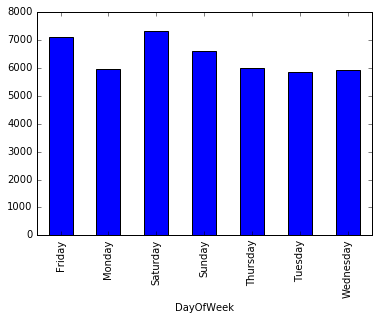

In [13]:
vandalism = crimes[crimes.Category == 'VANDALISM']
vandalism.groupby('DayOfWeek')['X'].count().plot(kind='bar')

## Question 5

Make a Pivot table showing for each day-of-week and hour-of-day the number of vehicle thefts. Plot it.

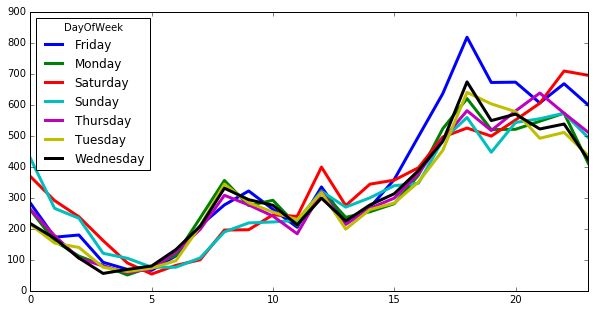

In [14]:
vehicle_thefts = crimes[crimes.Category == 'VEHICLE THEFT']
pd.pivot_table(data=vehicle_thefts, columns='DayOfWeek', 
               index=vehicle_thefts.index.hour, values='X', aggfunc='count')\
    .plot(figsize=(10,5), lw=3)

# Interesting questions

## Question 1

Use a bar plot to show for each category how many crimes had been on a street corner and many had not. Then find the category with the highest ratio of street-corner crimes.

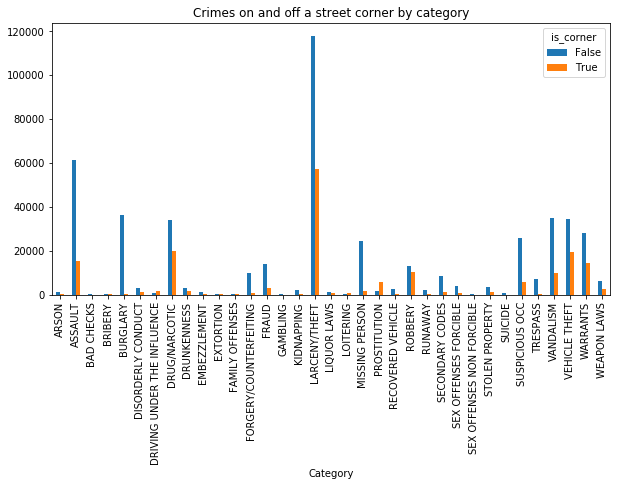

In [24]:
crimes['is_corner'] = crimes.Address.str.contains('/')
counts = crimes.groupby(['Category', 'is_corner'])['X'].count().unstack()
counts.plot.bar(figsize=(10,5), 
                title='Crimes on and off a street corner by category')

In [26]:
(counts[True] / counts[False]).argmax()

'PROSTITUTION'

## Question 2

In [17]:
def f(grp, cat):
    counts = grp.Resolution.value_counts()
    if cat in counts.index:
        return counts[cat] / float(len(grp))
    else:
        return 0

In [18]:
crimes.groupby('Category').apply(f, 'PSYCHOPATHIC CASE').sort_values(ascending=False).head()

Category
SUICIDE            0.202756
MISSING PERSON     0.008311
ARSON              0.007270
FAMILY OFFENSES    0.006110
DRUNKENNESS        0.004907
dtype: float64

## Question 3

What is the street with the highest number of burgleries?

In [19]:
addresses_str = ' '.join(crimes.Address[crimes.Category == 'BURGLARY'])
pd.Series(addresses_str.split()).value_counts().head()

Block    36316
of       36316
ST       26890
AV        7136
0         4120
dtype: int64

## Question 4

For the 5 most frequent categories, draw a plot of the number of cases per month.

> **NOTE:** To answer this question you should explore and use the _DatetimeIndex_ capabilities. Use the method [_Series.resample()_][resample]. See [here][offset] for information about the _rule_ argument, using the _offset_ string.

[resample]: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html "Series.resample()"
[offset]: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases "offset strings"

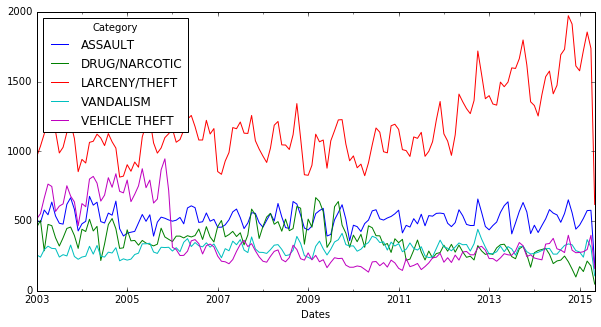

In [20]:
freq_categories = crimes['Category'].value_counts().nlargest(5)
freq_crimes = crimes[crimes.Category.isin(freq_categories.index)]
counts = freq_crimes.groupby('Category').resample('M')['X'].count()
counts.unstack(level=0, fill_value=0).plot(figsize=(10, 5))